> ## Natural Language Processing is the technology used to aid computers to understand the human’s natural language.

## Contents

- Introduction to NLP and NLTK

- NLP Pipeline

- Reading raw data

- Cleaning and Pre-processing

- Tokenization

- Vectorization

- Feature Engineering

- Training ML Algorithm for Classifying Spam and non-spam messages

## What is Natural Language Processing?
Natural Language Processing, usually shortened as NLP, is a branch of artificial intelligence that concerned with the ability of a computer to understand, analyze, manipulate and potentially generate human language.

Natural Language Processing or NLP is a very popular field and has lots of applications in our daily life. From typing a message to auto-classification of mails as Spam or not-spam NLP is everywhere.

## Areas of NLP
- Sentiment Analysis
- Topic Modeling
- Text Classification
- parts-of-speech Tagging / Sentence Segmentation

Core component of NLP is extracting all the information
from a block of text that is relevant to computer
understanding the language [task-specific]

### NLP Pipeline for Text Data
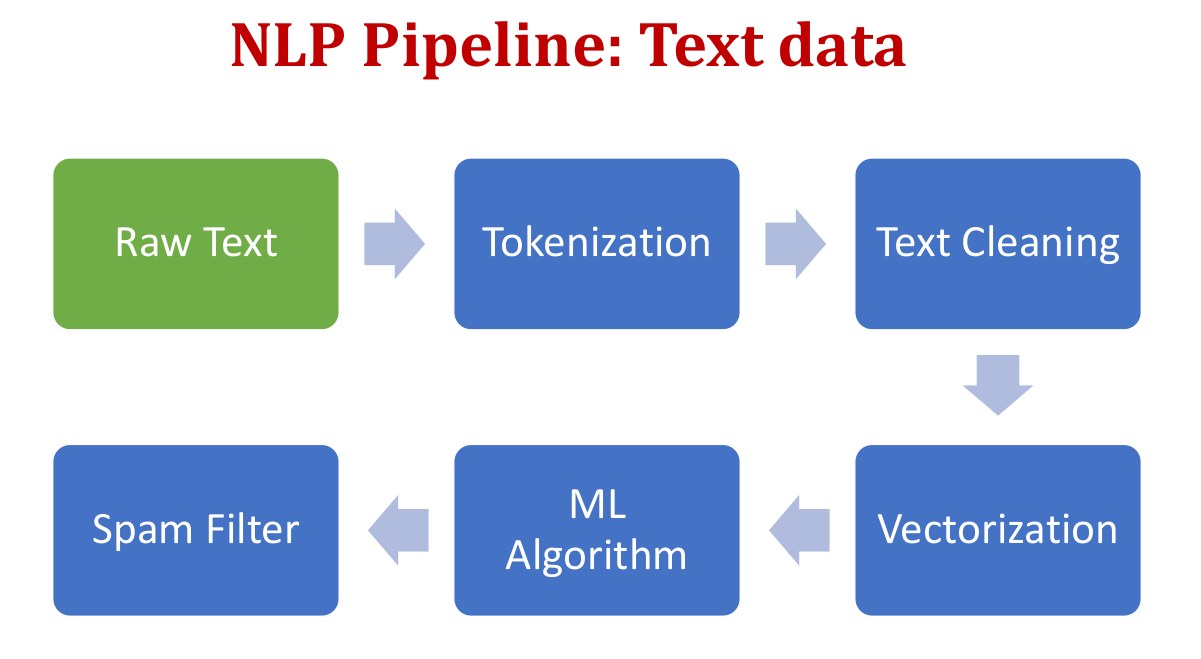

## Reading and Cleaning Data

### Import Packages

In [ ]:
import numpy as np
import pandas as pd
import nltk
# nltk.download()
dir(nltk)

###  Reading Text data

**Method 1: open()**

In [ ]:
raw_data = open('../input/sms-spam-collection-dataset/spam.csv',encoding='ISO-8859-1').read()
raw_data[0:500]


In [ ]:
parsed_data = raw_data.replace('\t','\n').split('\n')
parsed_data[0:10]

In [ ]:
label_list = parsed_data[0::2]
msg_list = parsed_data[1::2]
print(label_list[0:5])
print(msg_list[0:5])

In [ ]:
print(len(label_list))
print(len(msg_list))

print(label_list[-3:])

combined_df = pd.DataFrame({
    'label': label_list[:-1],
    'sms': msg_list
})


combined_df.head()

**Method 2: read_csv()**

In [ ]:
dataset = pd.read_csv('../input/sms-spam-collection-dataset/spam.csv', sep=",",encoding='ISO-8859-1')
dataset.head()

In [ ]:
dataset.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
dataset.info()

### Exploring the Data

In [ ]:
dataset.columns=['label','sms']
dataset.head()

In [ ]:
dataset.tail()

**Shape of data**

In [ ]:
print(f'Inpute data has {len(dataset)} rows, {len(dataset.columns)} columns')

**ham/spam**

In [ ]:
print(f'ham = {len(dataset[dataset["label"] == "ham"])}')
print(f'spam = {len(dataset[dataset["label"] == "spam"])}')

**Missing data**

In [ ]:

print(f"Numbers of missing label = {dataset['label'].isnull().sum()}")
print(f"Numbers of missing msg = {dataset['sms'].isnull().sum()}")

**Removing Punctuation**

In [ ]:
import string
string.punctuation

In [ ]:
def remove_punctuation(txt):
    txt_nopunct = "".join([c for c in txt if c not in string.punctuation])
    return txt_nopunct

In [ ]:
dataset['msg_clean'] = dataset['sms'].apply(lambda x: remove_punctuation(x))
dataset.head()

**Tokenization**

In [ ]:
import re

def tokenize(txt):
    tokens = re.split('\W+', txt)
    return tokens


dataset['msg_clean_tokenized'] = dataset['msg_clean'].apply(lambda x: tokenize(x.lower()))

dataset.head()

**Remove stop words**

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]

In [ ]:
def remove_stopwords(txt_tokenized):
    txt_clean = [word for word in txt_tokenized if word not in stopwords]
    return txt_clean

dataset['msg_no_sw'] = dataset['msg_clean_tokenized'].apply(lambda x: remove_stopwords(x))
dataset.head()

### Stemming and Lemmatization

**Porter Stemmer**

In [ ]:
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()
# dir(porter_stemmer)

In [ ]:
print(porter_stemmer.stem('programer'))
print(porter_stemmer.stem('programming'))
print(porter_stemmer.stem('program'))

In [ ]:
print(porter_stemmer.stem('run'))
print(porter_stemmer.stem('running'))

In [ ]:
def stemming(tokenized_text):
    text = [porter_stemmer.stem(word) for word in tokenized_text]
    return text

In [ ]:
dataset['msg_stemmed'] = dataset['msg_no_sw'].apply(lambda x: stemming(x))
dataset.head()

**Lemmatization** is similar to stemming but it brings context to the words.So it goes a steps further by linking words with similar meaning to one word.

 **WordNetLemmatizer**

In [ ]:
# WordNet lexical database for lemmatization
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

print(wordnet_lemmatizer.lemmatize('goose'))
print(wordnet_lemmatizer.lemmatize('geese'))

In [ ]:
def lemmatization(token_txt):
    text = [wordnet_lemmatizer.lemmatize(word) for word in token_txt]
    return text

In [ ]:
dataset['msg_lemmatized'] = dataset['msg_no_sw'].apply(lambda x : lemmatization(x))
dataset.head()

## Vectorization
Process of encoding text as integers to create Feature Vectors.

**Feature Vector:** vector of numerical features that represent an object

### Types of Vectorization
- Count Vectorization
- N-grams
- TF-IDF

**CountVectorizer**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

corpus = ["This is a sentence is",
         "This is another sentence",
         "third document is here"]


X = cv.fit(corpus)
print(X.vocabulary_)
print(cv.get_feature_names())

In [ ]:
X = cv.transform(corpus)
#X = cv.fit_transform(corpus)
print(X.shape)
print(X)
print(X.toarray())

df = pd.DataFrame(X.toarray(), columns = cv.get_feature_names())
print(df)

In [ ]:
def clean_text(txt):
    txt = "".join([c for c in txt if c not in string.punctuation])
    tokens = re.split('\W+', txt)
    txt = [porter_stemmer.stem(word) for word in tokens if word not in stopwords]
    return txt

cv1 = CountVectorizer(analyzer=clean_text)

X = cv1.fit_transform(dataset['sms'])
print(X.shape)


In [ ]:
print(cv1.get_feature_names())

In [ ]:
data_sample = dataset[0:10]
cv2 = CountVectorizer(analyzer=clean_text)

X = cv2.fit_transform(data_sample['sms'])
print(X.shape)

df = pd.DataFrame(X.toarray(), columns=cv2.get_feature_names())
df.head(10)

In [ ]:
def clean_text(txt):
    txt = "".join([c for c in txt if c not in string.punctuation])
    tokens = re.split('\W+', txt)
    txt = " ".join([porter_stemmer.stem(word) for word in tokens if word not in stopwords])
    return txt

dataset['sms_clean'] = dataset['sms'].apply(lambda x: clean_text(x))
dataset.head()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(2,3))

corpus = ["This is a sentence is",
         "This is another sentence",
         "third document is here"]

#X = cv.fit(corpus)
#print(X.vocabulary_)
#print(cv.get_feature_names())

#X = cv.transform(corpus)
X = cv.fit_transform(corpus)
print(X.shape)
#print(X)
#print(X.toarray())

df = pd.DataFrame(X.toarray(), columns = cv.get_feature_names())
print(df)

In [ ]:
cv1 = CountVectorizer(ngram_range=(2,2))

X = cv1.fit_transform(dataset['sms_clean'])
print(X.shape)

In [ ]:
print(cv1.get_feature_names())
data_sample = dataset[0:10]
cv2 = CountVectorizer(ngram_range=(2,2))

X = cv2.fit_transform(data_sample['sms_clean'])
print(X.shape)

In [ ]:
df = pd.DataFrame(X.toarray(), columns=cv2.get_feature_names())
df.head(10)

**TFIDF Vectorizer**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()

corpus = ["This is a sentence is",
         "This is another sentence",
         "third document is here"]


X = tfidf_vect.fit(corpus)
print(X.vocabulary_)
print(tfidf_vect.get_feature_names())

X = tfidf_vect.transform(corpus)
#X = cv.fit_transform(corpus)
print(X.shape)
print(X)
print(X.toarray())

df = pd.DataFrame(X.toarray(), columns = tfidf_vect.get_feature_names())
print(df)

In [ ]:
data_sample = dataset[0:10]
tfidf2 = TfidfVectorizer(analyzer=clean_text)

X = tfidf2.fit_transform(data_sample['sms'])
print(X.shape)

In [ ]:
df = pd.DataFrame(X.toarray(), columns=tfidf2.get_feature_names())
df.head(10)



Feature Engineering


Feature Engineering - Introduction


Feature Creation


Feature Evaluation


Power Transformations - Box CoxTransformation

Building Machine Learning Classifier


Evaluation Metrics - Accuracy,Precision and Recall


K-Fold Cross-Validation


Random Forest - Introduction


Building a basic Random Forest


Random Forest with holdout test
